# Evaluation Portfolio Submission Tasks:
---
## Problem Statement
Data Science:   https://www.nirfindia.org/2021/EngineeringRanking.html
given is the link to NIRF ranked institutes  in 2021. 
Pick up the ranking of top 5 institutes, the related data for these institutes is available. 

Perform an analysis of these 5 institutes. 

Data points of interest are:

*    Intake / Graduating students
*    Placements / Higher studies
*    Funding received  
*    Spending pattern

This isnt restricted to only this analysis - you can also provided further analysis.

The data should be represented visually with relevant references.

A brief write up on the analysis can be provided which can cover - approach to data, analytical process, tool used, formatting done, color schema. The same can also be submitted as a recording.

---

_First this is some general analysis before starting with the Data points of interest_

### Performing web scrapping to get top 5 ranking institutes


In [1]:
# !pip3 install beautifulsoup4
# !pip3 install requests
import sys
import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

In [2]:
static_url = "https://www.nirfindia.org/2021/EngineeringRanking.html"

### Now, request the HTML page from the above URL and get a response object



In [3]:
response = requests.get(static_url)

### Create a BeautifulSoup object from the HTML response



In [4]:
soup = BeautifulSoup(response.content, "html.parser")

In [5]:
soup.title

<title> MoE, National Institute Ranking Framework (NIRF) </title>

### Collect relevant data

In [6]:
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>
<html><head><script async="" src="//www.google-analytics.com/analytics.js"></script><script>(function (i, s, o, g, r, a, m) {i['GoogleAnalyticsObject'] = r; i[r] = i[r] || function () {(i[r].q = i[r].q || []).push(arguments)}, i[r].l = 1 * new Date(); a = s.createElement(o),m = s.getElementsByTagName(o)[0]; a.async = 1; a.src = g; m.parentNode.insertBefore(a, m)})(window, document, 'script', '//www.google-analytics.com/analytics.js', 'ga');ga('create', 'UA-75867016-1', 'auto');ga('send', 'pageview');</script><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><title> MoE, National Institute Ranking Framework (NIRF) </title><link href="https://www.nirfindia.org/css/style.css" rel="stylesheet" type="text/css"/><script src="https://www.nirfindia.org/js/modernizr.js" type="text/javascript"></script><script src="https://www.nirfindia.org/js/jquery-min.js" type="text/javascript"></script><script src="https://www.nirfindia.org/js/m

In [7]:
html_tables= soup.find_all('table')
print(html_tables[0])

<table class="table table-condensed" id="tbl_overall"><thead><tr><th style="20%">Institute ID</th><th>Name</th><th>City</th><th>State</th><th>Score</th><th>Rank</th></tr></thead><tbody><tr><td>IR-E-U-0456</td><td>Indian Institute of Technology Madras<div style="float:right;"><a class="btn-more-details" href="javascript:;"><span>More Details</span></a><a class="close_data" id="close_1" style="display: none;">Close</a> | <a href="https://www.nirfindia.org/nirfpdfcdn/2021/pdf/Engineering/IR-E-U-0456.pdf" target="_blank"><img src="https://www.nirfindia.org/images/pdf_icon.png" style="width: 20px; height: 20px !important"/></a> | <a href="https://www.nirfindia.org/nirfpdfcdn/2021/graph/Engineering/IR-E-U-0456.jpg" target="_blank"><img src="https://www.nirfindia.org/images/graph.png" style="width: 20px; height: 20px !important"/></a></div><div class="tbl_hidden" style="display:none;width:100%;"><br><table class="table"><thead><tr><th>TLR (100)</th><th>RPC (100)</th><th>GO (100)</th><th>OI (1

In [8]:
#helper functions

def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    
    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name   

In [9]:
#putting the column names from header in a list 
column_names = []
element = soup.find_all('th')
for row in range(len(element)):
    try:
        name = extract_column_from_header(element[row])
        if (name is not None and len(name) > 0):
            column_names.append(name)
    except:
        pass

In [10]:
print(column_names)
#this confirms we have accessed the right table

['Institute ID', 'Name', 'City', 'State', 'Score', 'Rank', 'TLR (100)', 'RPC (100)', 'GO (100)', 'OI (100)', 'PERCEPTION (100)', 'TLR (100)', 'RPC (100)', 'GO (100)', 'OI (100)', 'PERCEPTION (100)', 'TLR (100)', 'RPC (100)', 'GO (100)', 'OI (100)', 'PERCEPTION (100)', 'TLR (100)', 'RPC (100)', 'GO (100)', 'OI (100)', 'PERCEPTION (100)', 'TLR (100)', 'RPC (100)', 'GO (100)', 'OI (100)', 'PERCEPTION (100)', 'TLR (100)', 'RPC (100)', 'GO (100)', 'OI (100)', 'PERCEPTION (100)', 'TLR (100)', 'RPC (100)', 'GO (100)', 'OI (100)', 'PERCEPTION (100)', 'TLR (100)', 'RPC (100)', 'GO (100)', 'OI (100)', 'PERCEPTION (100)', 'TLR (100)', 'RPC (100)', 'GO (100)', 'OI (100)', 'PERCEPTION (100)', 'TLR (100)', 'RPC (100)', 'GO (100)', 'OI (100)', 'PERCEPTION (100)', 'TLR (100)', 'RPC (100)', 'GO (100)', 'OI (100)', 'PERCEPTION (100)', 'TLR (100)', 'RPC (100)', 'GO (100)', 'OI (100)', 'PERCEPTION (100)', 'TLR (100)', 'RPC (100)', 'GO (100)', 'OI (100)', 'PERCEPTION (100)', 'TLR (100)', 'RPC (100)', 'GO (

### Creating an initial dataframe

In [11]:
table = soup.find_all('table',"table table-condensed")
df = pd.read_html(str(table))[0]

In [12]:
#for top5 rankings
df_top = df.head()
df_top

,Institute ID,Name,City,State,Score,Rank
0,IR-E-U-0456,Indian Institute of Technology MadrasMore Deta...,Chennai,Tamil Nadu,90.19,1
1,IR-E-I-1074,Indian Institute of Technology DelhiMore Detai...,New Delhi,Delhi,88.96,2
2,IR-E-U-0306,Indian Institute of Technology BombayMore Deta...,Mumbai,Maharashtra,85.16,3
3,IR-E-I-1075,Indian Institute of Technology KanpurMore Deta...,Kanpur,Uttar Pradesh,83.22,4
4,IR-E-U-0573,Indian Institute of Technology KharagpurMore D...,Kharagpur,West Bengal,82.03,5


### Creating Bubble Plot of Attributes: Score vs Rank to visualise their relationship

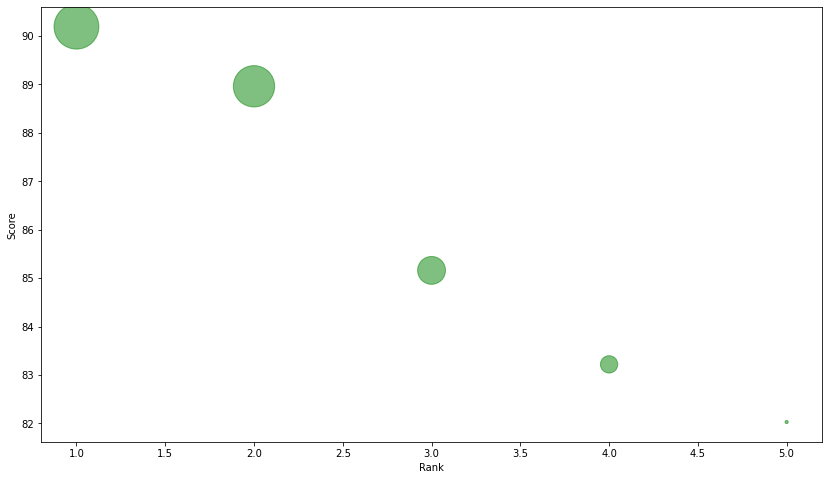

In [13]:
# we will choose feature scaling to create normalized weights first
import plotly

norm_score = (df_top['Score'] - df_top['Score'].min()) / (df_top['Score'].max() - df_top['Score'].min())


ax = df_top.plot(kind='scatter',
                    y='Score',
                    x='Rank',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_score * 2000 + 10 #we have used normalized score weights for the z axis
                )

**We can see a Negative Linear Correlation b/w Score and Rank**

**But that is to be expected as Lower the Rank means better the score, thus confirming no outlier in our retrieved data**

### One can further analyse this data to try and predict what score would institutes with a specific rank have?

In [14]:
#We will use a Linear Regression Model
from sklearn import linear_model
import numpy as np

regr = linear_model.LinearRegression()
X = df_top[['Rank']]
y = df_top[['Score']]
regr.fit(X, y)

pred = regr.predict(df[['Rank']][5:10])

##Let's see our predicted score and actual score side by side
print(pred,'\n', df[['Score']][5:10])

[[79.294]
 [77.088]
 [74.882]
 [72.676]
 [70.47 ]] 
    Score
5  78.08
6  73.84
7  68.69
8  66.08
9  64.19


We can see for a few observations, our predicted values seemed to kinda match with the actual values but went sideways afterwards.

Meaning our model has a very poor performance, this can also be observed using the evaluation metric 'R-Sqaured'.

In [15]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(df[['Rank']][5:] , regr.predict(df[['Rank']][5:])))

R2-score: -27.11


*A negative R2-score!*

*and of that much magnitude!!!*

*This means our model is abritrarily worse!!!!!*

But don't worry, that was to be expected as neither did we tune any hyper parameters, but most important of all => **we trained it on just 5 data points.**

We can increase the accuracy of our model by quite a lot by following the below:
1. Increasing Training Data
2. Tuning & Tweaking of hyper parameters
3. Splitting data into Testing & Training sets
4. Using Cross Validation
5. Normalize Data etc.


Coefficients:  [[-2.206]]
Intercept:  [92.53]


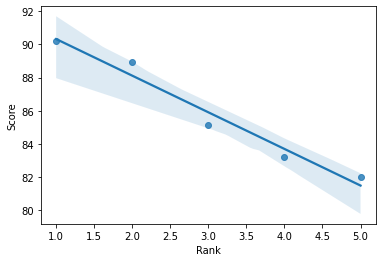

In [16]:
import seaborn as sns

lr = sns.regplot(x="Rank", y="Score", data=df_top, fit_reg= True)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

# Now let's get started with analysing Individual Institutes 
---
we can either download the data, i.e. in PDF format to our local machine using **wget** module like this

In [17]:
#list to store each institude ID using list comprehension
ins_id = [x for x in df_top['Institute ID']]
ins_id

['IR-E-U-0456', 'IR-E-I-1074', 'IR-E-U-0306', 'IR-E-I-1075', 'IR-E-U-0573']

In [18]:
#Now let's download each Institute record 
# !pip install wget
import wget

for i in ins_id:
    print(f'\nBeginning file download for Institute ID: {i}...')
    url = f'https://www.nirfindia.org/nirfpdfcdn/2021/pdf/Engineering/{i}.pdf'
    wget.download(url, f'/Users/NemoKumar/Downloads/NIRF TOP5/{i}.pdf')
    #must create a folder named 'NIRF TOP5' in your downloads directory or alter the code to your specifics


Beginning file download for Institute ID: IR-E-U-0456...
100% [..............................................................................] 11452 / 11452
Beginning file download for Institute ID: IR-E-I-1074...
100% [..............................................................................] 10071 / 10071
Beginning file download for Institute ID: IR-E-U-0306...
100% [..............................................................................] 10211 / 10211
Beginning file download for Institute ID: IR-E-I-1075...
100% [................................................................................] 8658 / 8658
Beginning file download for Institute ID: IR-E-U-0573...
100% [..............................................................................] 12022 / 12022

Or read PDFs as a list of tables remotly without downloading them to local machine using **tabula-py** library, which converts it into dataframes automatically.

## 1. EDA on ```ins_id[0]``` i.e. IIT MADRAS

In [19]:
# !pip install tabula-py
import tabula

dfs1 = tabula.read_pdf(f'https://www.nirfindia.org/nirfpdfcdn/2021/pdf/Engineering/{ins_id[0]}.pdf', pages='all')
'''
for the sake of simplicity, 
we will only stick to 'UG [4 Years Program(s)]: Placement & higher studies for previous 3 years' table 
'''

dfs1_2 = dfs1[2]
dfs1_2

,Academic Year,No. of first year\rstudents intake in the\ryear,No. of first year\rstudents admitted in\rthe year,Academic Year.1,No. of students\radmitted through\rLateral entry,Academic Year.2,No. of students\rgraduating in\rminimum stipulated\rtime,No. of students\rplaced,Median salary of\rplaced\rgraduates(Amount in\rRs.),No. of students\rselected for Higher\rStudies
0,2014-15,466,441,2015-16,0,2017-18,334,283,1306000(Thirteen\rlakhs six thousand),51
1,2015-16,466,458,2016-17,0,2018-19,362,268,1360000(Thirteen\rLakhs Sixty thousand),65
2,2016-17,466,465,2017-18,0,2019-20,374,286,1500000(Fifteen lakhs),43


### DATA WRANGLING

#### Dropping uneneccasary columns

In [20]:
unn = ['Academic Year.1', 'Academic Year.2']
dfs1_2 = dfs1_2.drop(unn, 1)
dfs1_2

C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/3993075200.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfs1_2 = dfs1_2.drop(unn, 1)


,Academic Year,No. of first year\rstudents intake in the\ryear,No. of first year\rstudents admitted in\rthe year,No. of students\radmitted through\rLateral entry,No. of students\rgraduating in\rminimum stipulated\rtime,No. of students\rplaced,Median salary of\rplaced\rgraduates(Amount in\rRs.),No. of students\rselected for Higher\rStudies
0,2014-15,466,441,0,334,283,1306000(Thirteen\rlakhs six thousand),51
1,2015-16,466,458,0,362,268,1360000(Thirteen\rLakhs Sixty thousand),65
2,2016-17,466,465,0,374,286,1500000(Fifteen lakhs),43


#### Making the column names more comprehensible

In [21]:
dfs1_2.columns = ['Academic Year', 
                  'No. of first year students intake in the year', 
                  'No. of first year students admitted in the year',
                  'No. of students admitted through Lateral entry', 
                  'No. of students graduating in minimum stipulated time',
                  'No. of students placed',
                  'Median salary of placed graduates(Amount inRs.)', 
                  'No. of students selected for Higher Studies']
dfs1_2

,Academic Year,No. of first year students intake in the year,No. of first year students admitted in the year,No. of students admitted through Lateral entry,No. of students graduating in minimum stipulated time,No. of students placed,Median salary of placed graduates(Amount inRs.),No. of students selected for Higher Studies
0,2014-15,466,441,0,334,283,1306000(Thirteen\rlakhs six thousand),51
1,2015-16,466,458,0,362,268,1360000(Thirteen\rLakhs Sixty thousand),65
2,2016-17,466,465,0,374,286,1500000(Fifteen lakhs),43


## DATA VISUALIZATION & ANALYSIS
### 1. No. of first year students admitted in year VS No. of students graduating in minimum stipulated time



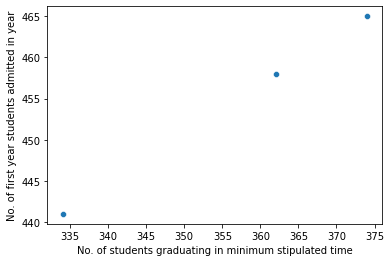

In [22]:
# !pip install matplotlib.pyplot
import matplotlib.pyplot as plt

sns.scatterplot(y="No. of first year students admitted in the year", x="No. of students graduating in minimum stipulated time", data=dfs1_2)
plt.ylabel("No. of first year students admitted in year",fontsize=10)
plt.xlabel("No. of students graduating in minimum stipulated time",fontsize=10)
plt.show()

#### We can clearly see that there is a positive collinearity between the above two attributes
That is with increasing No. of first year students admitted in year, No. of students graduating in minimum stipulated time also increased, which is to be expected as well.

### 2. No. of students placed VS Academic Year

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students placed'>

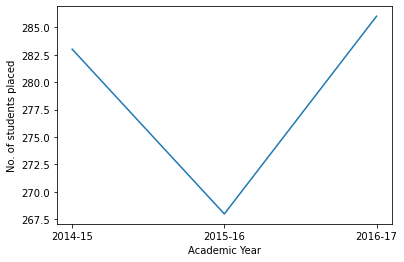

In [23]:
sns.lineplot(data=dfs1_2, y='No. of students placed', x='Academic Year')

#### As observed above, there is no linear relation between the two attributes 
But what we can see is that there was dip in placements during the year 2015-16, which may be due to some underlying reason
_(to which we have an answer in the below visualization)._

### 3. No. of students selected for Higher Studies VS Academic Year


<AxesSubplot:xlabel='Academic Year', ylabel='No. of students selected for Higher Studies'>

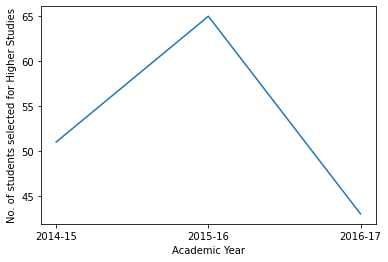

In [24]:
sns.lineplot(data=dfs1_2, y='No. of students selected for Higher Studies', x='Academic Year')

#### This has an inverse trend as compared to the above
we can see here that in year 2015-16 No. of students selected for Higher Studies were far more than other two academic years.
Hence, this resulted in a dip in placements that year also.(answer to above analysis query)

### Now lets move onto 'Sponsored Research Details' Table to get Funding details.

In [25]:
dfs1_11 = dfs1[11]
dfs1_11

,Financial Year,2019-20,2018-19,2017-18
0,Total no. of Sponsored Projects,612,580,579
1,Total no. of Funding Agencies,104,69,88
2,Total Amount Received (Amount in Rupees),3903460211,5223395988,3177083996
3,Amount Received in Words,Three Hundred and Ninety Crore Thirty four lak...,Five hundred and Twenty Two Crore Thirty Three...,Three hundred and Seventeen Crore Seventy lakh...


### Data  Wrangling 

#### Transpose the tha dataframe and set relevant column names

In [26]:
dfs1_11 = dfs1_11.transpose()
dfs1_11.reset_index(inplace=True)
dfs1_11.columns = ['Financial Year',
                   'Total no. of Sponsored Projects', 
                   'Total no. of Funding Agencies',
                   'Total Amount Received (Amount in Rupees)',
                   'Amount Received in Words']
dfs1_11

,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees),Amount Received in Words
0,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees),Amount Received in Words
1,2019-20,612,104,3903460211,Three Hundred and Ninety Crore Thirty four lak...
2,2018-19,580,69,5223395988,Five hundred and Twenty Two Crore Thirty Three...
3,2017-18,579,88,3177083996,Three hundred and Seventeen Crore Seventy lakh...


#### Drop irrelevant rows

In [27]:
dfs1_11=dfs1_11.drop(0)
dfs1_11

,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees),Amount Received in Words
1,2019-20,612,104,3903460211,Three Hundred and Ninety Crore Thirty four lak...
2,2018-19,580,69,5223395988,Five hundred and Twenty Two Crore Thirty Three...
3,2017-18,579,88,3177083996,Three hundred and Seventeen Crore Seventy lakh...


#### Drop irrelevant Column

In [28]:
dfs1_11=dfs1_11.drop(['Amount Received in Words'], axis =1)
dfs1_11

,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees)
1,2019-20,612,104,3903460211
2,2018-19,580,69,5223395988
3,2017-18,579,88,3177083996


### Also convert Total Amount Received (Amount in Rupees) Column data type from object to int64

In [29]:
print(dfs1_11.dtypes)
dfs1_11 = dfs1_11.astype({'Total Amount Received (Amount in Rupees)' :'int64'})
print(dfs1_11.dtypes)

Financial Year                              object
Total no. of Sponsored Projects             object
Total no. of Funding Agencies               object
Total Amount Received (Amount in Rupees)    object
dtype: object
Financial Year                              object
Total no. of Sponsored Projects             object
Total no. of Funding Agencies               object
Total Amount Received (Amount in Rupees)     int64
dtype: object


Now let's start analyzing & visualization again

### 4. Total Amount Received


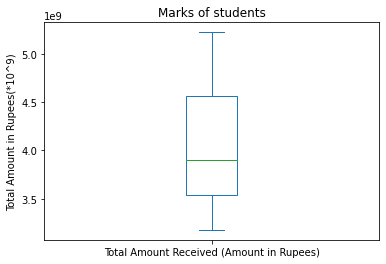

In [30]:
# let's use a boxplot

dfs1_11['Total Amount Received (Amount in Rupees)'].plot(kind='box', title='Marks of students')
plt.ylabel('Total Amount in Rupees(*10^9)')
plt.show()

#### From the above box plot, we can observe the following:
- Median: 3903460211
- Maximum = 5223395988
- Minimum =3177083996

### 5. Now, let's analyze 'Financial Resources: Utilised Amount for the Capital expenditure for previous 3 years' table to understand spending patterns

In [31]:
dfs1_9 = dfs1[9]
dfs1_9

,Annual Capital Expenditure on Academic Activities and Resources (excluding expenditure on buildings),Unnamed: 0,Unnamed: 1,Unnamed: 2
0,"Library ( Books, Journals and e-Resources only)",181223515 (Eighteen Crore Twelve Lakh Twenty T...,174628165 (Seventeen Crore Forty Six Lakh Twen...,188456181 (Eighteen Crore Eighty Four Lakh Fif...
1,New Equipment and software for Laboratories,1865813663 (One Eighty Six crore Fifty Eight l...,2052783456 (Two hundred and Five crore Twenty...,1838176237 (One hundred and Eighty Three crore...
2,Engineering Workshops,519428 (Five Lakh Ninteen Thousand Four Hundre...,4157456 (Forty One Lakh Fifty Seven Thousand F...,6288472 (Sixty Two Lakh Eighty Eight Thousand ...
3,Other expenditure on creation of Capital Asset...,256594552 (Twenty Five Crore Sixty Five Lakh N...,55256201 (Five Crore Fifty Two Lakh Fifty Six ...,131891456 (Thirteen Crore Eighteen Lakh Ninety...


### Let's clean and pre process this data

#### Transpose

In [32]:
dfs1_9 = dfs1_9.transpose()
dfs1_9

,0,1,2,3
Annual Capital Expenditure on Academic Activities and Resources (excluding expenditure on buildings),"Library ( Books, Journals and e-Resources only)",New Equipment and software for Laboratories,Engineering Workshops,Other expenditure on creation of Capital Asset...
Unnamed: 0,181223515 (Eighteen Crore Twelve Lakh Twenty T...,1865813663 (One Eighty Six crore Fifty Eight l...,519428 (Five Lakh Ninteen Thousand Four Hundre...,256594552 (Twenty Five Crore Sixty Five Lakh N...
Unnamed: 1,174628165 (Seventeen Crore Forty Six Lakh Twen...,2052783456 (Two hundred and Five crore Twenty...,4157456 (Forty One Lakh Fifty Seven Thousand F...,55256201 (Five Crore Fifty Two Lakh Fifty Six ...
Unnamed: 2,188456181 (Eighteen Crore Eighty Four Lakh Fif...,1838176237 (One hundred and Eighty Three crore...,6288472 (Sixty Two Lakh Eighty Eight Thousand ...,131891456 (Thirteen Crore Eighteen Lakh Ninety...


#### Set columns & reset indices

In [33]:
dfs1_9.columns = ['Library', 'Software & Equipment', 'Eng Workshop', 'Others']
dfs1_9.reset_index(drop = True, inplace=True)

#### Drop irrelevant row

In [34]:
dfs1_9 = dfs1_9.drop(0)

#### Add the Financial Column Back

In [35]:
fin_yr = ['2019-20', '2018-19', '2017-18']
dfs1_9['Financial Year'] = fin_yr

In [36]:
dfs1_9['Library'] = dfs1_9['Library'].str.replace('\d+', '')
dfs1_9['Software & Equipment'] = dfs1_9['Software & Equipment'].str.replace('\d+', '')
dfs1_9['Eng Workshop'] = dfs1_9['Eng Workshop'].str.replace('\d+', '')
dfs1_9['Others'] = dfs1_9['Others'].str.replace('\d+', '')


C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/1650137577.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs1_9['Library'] = dfs1_9['Library'].str.replace('\d+', '')
C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/1650137577.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs1_9['Software & Equipment'] = dfs1_9['Software & Equipment'].str.replace('\d+', '')
C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/1650137577.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs1_9['Eng Workshop'] = dfs1_9['Eng Workshop'].str.replace('\d+', '')
C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/1650137577.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs1_9['Others'] = dfs1_9['Others'].str.replace('\d+', '')


In [37]:
dfs1_9

,Library,Software & Equipment,Eng Workshop,Others,Financial Year
1,(Eighteen Crore Twelve Lakh Twenty Three\rTho...,(One Eighty Six crore Fifty Eight lakhs Thirt...,(Five Lakh Ninteen Thousand Four Hundred Twen...,(Twenty Five Crore Sixty Five Lakh Ninety Fou...,2019-20
2,(Seventeen Crore Forty Six Lakh Twenty Eight\...,(Two hundred and Five crore Twenty Seven\rla...,(Forty One Lakh Fifty Seven Thousand Four Hun...,(Five Crore Fifty Two Lakh Fifty Six Thousand...,2018-19
3,(Eighteen Crore Eighty Four Lakh Fifty Six\rT...,(One hundred and Eighty Three crore Eighty on...,(Sixty Two Lakh Eighty Eight Thousand Four Hu...,(Thirteen Crore Eighteen Lakh Ninety One\rTho...,2017-18


This is the final Clean data to analyze Spending Patterns.

In [32]:
dfs1_9 = dfs1_9.transpose()
dfs1_9

,0,1,2,3
Annual Capital Expenditure on Academic Activities and Resources (excluding expenditure on buildings),"Library ( Books, Journals and e-Resources only)",New Equipment and software for Laboratories,Engineering Workshops,Other expenditure on creation of Capital Asset...
Unnamed: 0,181223515 (Eighteen Crore Twelve Lakh Twenty T...,1865813663 (One Eighty Six crore Fifty Eight l...,519428 (Five Lakh Ninteen Thousand Four Hundre...,256594552 (Twenty Five Crore Sixty Five Lakh N...
Unnamed: 1,174628165 (Seventeen Crore Forty Six Lakh Twen...,2052783456 (Two hundred and Five crore Twenty...,4157456 (Forty One Lakh Fifty Seven Thousand F...,55256201 (Five Crore Fifty Two Lakh Fifty Six ...
Unnamed: 2,188456181 (Eighteen Crore Eighty Four Lakh Fif...,1838176237 (One hundred and Eighty Three crore...,6288472 (Sixty Two Lakh Eighty Eight Thousand ...,131891456 (Thirteen Crore Eighteen Lakh Ninety...


#### Set columns & reset indices

In [33]:
dfs1_9.columns = ['Library', 'Software & Equipment', 'Eng Workshop', 'Others']
dfs1_9.reset_index(drop = True, inplace=True)

### Now the same procedure repeats for other 4 Institutes as well
One can even create a utility function to do repeat the same steps for other institutes as well.

But this data has small variation for each pdf, such as table number. 

So it's best to do some stuff manually.

## 2. EDA on ```ins_id[1]``` i.e. IIT DELHI

In [45]:
# !pip install tabula-py
import tabula

dfs2 = tabula.read_pdf(f'https://www.nirfindia.org/nirfpdfcdn/2021/pdf/Engineering/{ins_id[1]}.pdf', pages='all')
'''
for the sake of simplicity, 
we will only stick to 'UG [4 Years Program(s)]: Placement & higher studies for previous 3 years' table 
'''

dfs2_2 = dfs2[2]
dfs2_2

,Academic Year,No. of first year\rstudents intake in the\ryear,No. of first year\rstudents admitted in\rthe year,Academic Year.1,No. of students\radmitted through\rLateral entry,Academic Year.2,No. of students\rgraduating in\rminimum stipulated\rtime,No. of students\rplaced,Median salary of\rplaced\rgraduates(Amount in\rRs.),No. of students\rselected for Higher\rStudies
0,2014-15,749,759,2015-16,0,2017-18,654,431,1306000(Thirteen Lakh\rSix Thousand Only),70
1,2015-16,749,759,2016-17,0,2018-19,615,495,1570000(Fifteen Lakh\rSeventy Thousand\rOnly),78
2,2016-17,749,751,2017-18,0,2019-20,650,511,1550000(Fifteen Lakh\rFifty Thousand Only),90


### DATA WRANGLING

#### Dropping uneneccasary columns

In [46]:
unn = ['Academic Year.1', 'Academic Year.2']
dfs2_2 = dfs2_2.drop(unn, 1)
dfs2_2

C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/315940187.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfs2_2 = dfs2_2.drop(unn, 1)


,Academic Year,No. of first year\rstudents intake in the\ryear,No. of first year\rstudents admitted in\rthe year,No. of students\radmitted through\rLateral entry,No. of students\rgraduating in\rminimum stipulated\rtime,No. of students\rplaced,Median salary of\rplaced\rgraduates(Amount in\rRs.),No. of students\rselected for Higher\rStudies
0,2014-15,749,759,0,654,431,1306000(Thirteen Lakh\rSix Thousand Only),70
1,2015-16,749,759,0,615,495,1570000(Fifteen Lakh\rSeventy Thousand\rOnly),78
2,2016-17,749,751,0,650,511,1550000(Fifteen Lakh\rFifty Thousand Only),90


#### Making the column names more comprehensible

In [51]:
dfs2_2.columns = ['Academic Year', 
                  'No. of first year students intake in the year', 
                  'No. of first year students admitted in the year',
                  'No. of students admitted through Lateral entry', 
                  'No. of students graduating in minimum stipulated time',
                  'No. of students placed',
                  'Median salary of placed graduates(Amount inRs.)', 
                  'No. of students selected for Higher Studies']
dfs2_2

,Academic Year,No. of first year students intake in the year,No. of first year students admitted in the year,No. of students admitted through Lateral entry,No. of students graduating in minimum stipulated time,No. of students placed,Median salary of placed graduates(Amount inRs.),No. of students selected for Higher Studies
0,2014-15,749,759,0,654,431,1306000(Thirteen Lakh\rSix Thousand Only),70
1,2015-16,749,759,0,615,495,1570000(Fifteen Lakh\rSeventy Thousand\rOnly),78
2,2016-17,749,751,0,650,511,1550000(Fifteen Lakh\rFifty Thousand Only),90


## DATA VISUALIZATION & ANALYSIS
### 1. No. of first year students admitted in year VS No. of students graduating in minimum stipulated time



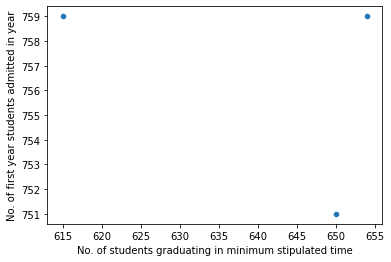

In [53]:
# !pip install matplotlib.pyplot
import matplotlib.pyplot as plt

sns.scatterplot(y="No. of first year students admitted in the year", x="No. of students graduating in minimum stipulated time", data=dfs2_2)
plt.ylabel("No. of first year students admitted in year",fontsize=10)
plt.xlabel("No. of students graduating in minimum stipulated time",fontsize=10)
plt.show()

#### There Does not seem to be any relation among them

### 2. No. of students placed VS Academic Year

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students placed'>

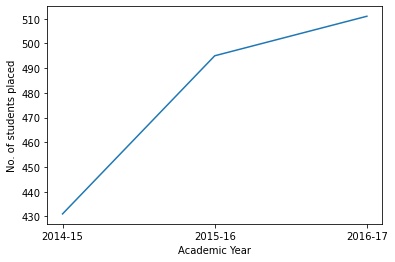

In [55]:
sns.lineplot(data=dfs2_2, y='No. of students placed', x='Academic Year')

#### As observed above, there seems to be positive linear relation between the two attributes 
But what we can see is that there was spike in placements during the year 2015-16, which may be due to some underlying reason
_(to which we have an answer in the below visualization)._

### 3. No. of students selected for Higher Studies VS Academic Year


<AxesSubplot:xlabel='Academic Year', ylabel='No. of students selected for Higher Studies'>

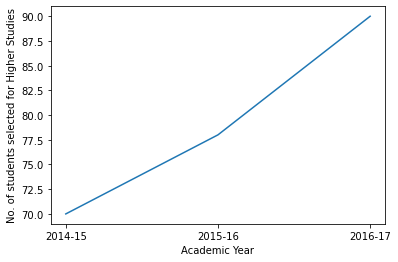

In [56]:
sns.lineplot(data=dfs2_2, y='No. of students selected for Higher Studies', x='Academic Year')

#### This has an inverse trend as compared to the above
we can see here that in year 2015-16 No. of students selected for Higher Studies were less than other two academic years.
Hence, this resulted in a spike in placements that year also.(answer to above analysis query)

### Now lets move onto 'Sponsored Research Details' Table to get Funding details.

In [61]:
dfs2_9= dfs2[9]
dfs2_9

,Financial Year,2019-20,2018-19,2017-18
0,Total no. of Sponsored Projects,624,567,964
1,Total no. of Funding Agencies,195,140,153
2,Total Amount Received (Amount in Rupees),2275026000,2048965952,5411417468
3,Amount Received in Words,Two Hundred Twenty Seven Crore Fifty Lakh Twen...,Two Hundred Four Crore Eighty Nine Lakh Sixty ...,Five Hundred Forty One Crore Fourteen Lakh\rSe...


### Data  Wrangling 

#### Transpose the tha dataframe and set relevant column names

In [62]:
dfs2_9 = dfs2_9.transpose()
dfs2_9.reset_index(inplace=True)
dfs2_9.columns = ['Financial Year',
                   'Total no. of Sponsored Projects', 
                   'Total no. of Funding Agencies',
                   'Total Amount Received (Amount in Rupees)',
                   'Amount Received in Words']
dfs2_9

,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees),Amount Received in Words
0,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees),Amount Received in Words
1,2019-20,624,195,2275026000,Two Hundred Twenty Seven Crore Fifty Lakh Twen...
2,2018-19,567,140,2048965952,Two Hundred Four Crore Eighty Nine Lakh Sixty ...
3,2017-18,964,153,5411417468,Five Hundred Forty One Crore Fourteen Lakh\rSe...


#### Drop irrelevant rows

In [63]:
dfs2_9=dfs2_9.drop(0)
dfs2_9

,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees),Amount Received in Words
1,2019-20,624,195,2275026000,Two Hundred Twenty Seven Crore Fifty Lakh Twen...
2,2018-19,567,140,2048965952,Two Hundred Four Crore Eighty Nine Lakh Sixty ...
3,2017-18,964,153,5411417468,Five Hundred Forty One Crore Fourteen Lakh\rSe...


#### Drop irrelevant Column

In [64]:
dfs2_9=dfs2_9.drop(['Amount Received in Words'], axis =1)
dfs2_9

,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees)
1,2019-20,624,195,2275026000
2,2018-19,567,140,2048965952
3,2017-18,964,153,5411417468


### Also convert Total Amount Received (Amount in Rupees) Column data type from object to int64

In [67]:
print(dfs2_9.dtypes)
dfs2_9 = dfs2_9.astype({'Total Amount Received (Amount in Rupees)' :'int64'})
print(dfs2_9.dtypes)

Financial Year                              object
Total no. of Sponsored Projects             object
Total no. of Funding Agencies               object
Total Amount Received (Amount in Rupees)    object
dtype: object
Financial Year                              object
Total no. of Sponsored Projects             object
Total no. of Funding Agencies               object
Total Amount Received (Amount in Rupees)     int64
dtype: object


Now let's start analyzing & visualization again

### 4. Total Amount Received


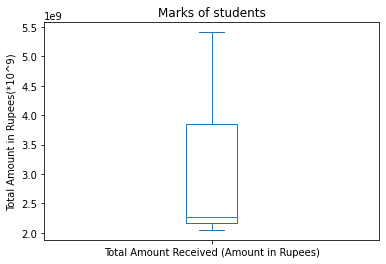

In [68]:
# let's use a boxplot

dfs2_9['Total Amount Received (Amount in Rupees)'].plot(kind='box', title='Marks of students')
plt.ylabel('Total Amount in Rupees(*10^9)')
plt.show()

#### From the above box plot, we can observe the following:
- Median: 2048965952
- Maximum = 5411417468
- Minimum = 2048965952

### 5. Now, let's analyze 'Financial Resources: Utilised Amount for the Capital expenditure for previous 3 years' table to understand spending patterns

In [73]:
dfs2_7 = dfs2[7]
dfs2_7

,Financial Year,2019-20,2018-19,2017-18
0,NaN,Utilised Amount,Utilised Amount,Utilised Amount
1,Annual Capital Expenditure on Academic Activit...,NaN,NaN,NaN
2,"Library ( Books, Journals and e-Resources only)",170086147 (Seventeen Crore Eighty Six Thousand...,160271963 (Sixteen Crore Two Lakh Seventy One ...,146125000 (Fourteen Crore Sixty One Lakh Twent...
3,New Equipment and software for Laboratories,1827027685 (One Hundred Eighty Two Crore Seven...,1793766462 (One Hundred Seventy Nine Crore Thi...,1424680000 (One Hundred Forty Two Crore Forty ...
4,Engineering Workshops,4058686 (Forty Lakh Fifty Eight Thousand Six H...,4302116 (Forty Three lakh Two Thousand One Hun...,5399000 (Fifty Three Lakh Ninety Nine Thousand...
5,Other expenditure on creation of Capital Asset...,745381664 (Seventy Four Crore Fifty Three Lakh...,764538188 (Seventy Six Crore Forty five Lakh T...,894827000 (Eighty Nine Crore Forty Eight Lakh ...


### Let's clean and pre process this data

#### Transpose

In [79]:
dfs2_7 = dfs2_7.transpose()
dfs2_7

,0,1,2,3,4,5
Financial Year,NaN,Annual Capital Expenditure on Academic Activit...,"Library ( Books, Journals and e-Resources only)",New Equipment and software for Laboratories,Engineering Workshops,Other expenditure on creation of Capital Asset...
2019-20,Utilised Amount,NaN,170086147 (Seventeen Crore Eighty Six Thousand...,1827027685 (One Hundred Eighty Two Crore Seven...,4058686 (Forty Lakh Fifty Eight Thousand Six H...,745381664 (Seventy Four Crore Fifty Three Lakh...
2018-19,Utilised Amount,NaN,160271963 (Sixteen Crore Two Lakh Seventy One ...,1793766462 (One Hundred Seventy Nine Crore Thi...,4302116 (Forty Three lakh Two Thousand One Hun...,764538188 (Seventy Six Crore Forty five Lakh T...
2017-18,Utilised Amount,NaN,146125000 (Fourteen Crore Sixty One Lakh Twent...,1424680000 (One Hundred Forty Two Crore Forty ...,5399000 (Fifty Three Lakh Ninety Nine Thousand...,894827000 (Eighty Nine Crore Forty Eight Lakh ...


#### Set columns & reset indices

In [91]:
dfs2_7.columns = ['Drop1','Drop','Library', 'Software & Equipment', 'Eng Workshop', 'Others']
dfs2_7.reset_index(drop = True, inplace=True)
dfs2_7.drop('Drop1', axis =1, inplace=True)
dfs2_7.drop('Drop', axis =1, inplace=True)
dfs2_7

,Library,Software & Equipment,Eng Workshop,Others
0,"Library ( Books, Journals and e-Resources only)",New Equipment and software for Laboratories,Engineering Workshops,Other expenditure on creation of Capital Asset...
1,170086147 (Seventeen Crore Eighty Six Thousand...,1827027685 (One Hundred Eighty Two Crore Seven...,4058686 (Forty Lakh Fifty Eight Thousand Six H...,745381664 (Seventy Four Crore Fifty Three Lakh...
2,160271963 (Sixteen Crore Two Lakh Seventy One ...,1793766462 (One Hundred Seventy Nine Crore Thi...,4302116 (Forty Three lakh Two Thousand One Hun...,764538188 (Seventy Six Crore Forty five Lakh T...
3,146125000 (Fourteen Crore Sixty One Lakh Twent...,1424680000 (One Hundred Forty Two Crore Forty ...,5399000 (Fifty Three Lakh Ninety Nine Thousand...,894827000 (Eighty Nine Crore Forty Eight Lakh ...


#### Drop irrelevant row

In [93]:
dfs2_7 = dfs2_7.drop(0)

#### Add the Financial Column Back

In [96]:
fin_yr = ['2019-20', '2018-19', '2017-18']
dfs2_7['Financial Year'] = fin_yr

In [97]:
dfs2_7['Library'] = dfs2_7['Library'].str.replace('\d+', '')
dfs2_7['Software & Equipment'] = dfs2_7['Software & Equipment'].str.replace('\d+', '')
dfs2_7['Eng Workshop'] = dfs2_7['Eng Workshop'].str.replace('\d+', '')
dfs2_7['Others'] = dfs2_7['Others'].str.replace('\d+', '')


C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/1208133332.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs2_7['Library'] = dfs2_7['Library'].str.replace('\d+', '')
C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/1208133332.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs2_7['Software & Equipment'] = dfs2_7['Software & Equipment'].str.replace('\d+', '')
C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/1208133332.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs2_7['Eng Workshop'] = dfs2_7['Eng Workshop'].str.replace('\d+', '')
C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/1208133332.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs2_7['Others'] = dfs2_7['Others'].str.replace('\d+', '')


In [98]:
dfs2_7

,Library,Software & Equipment,Eng Workshop,Others,Financial Year
1,(Seventeen Crore Eighty Six Thousand One\rHun...,(One Hundred Eighty Two Crore Seventy Lakh\rT...,(Forty Lakh Fifty Eight Thousand Six Hundred ...,(Seventy Four Crore Fifty Three Lakh Eighty O...,2019-20
2,(Sixteen Crore Two Lakh Seventy One Thousand\...,(One Hundred Seventy Nine Crore Thirty Seven\...,(Forty Three lakh Two Thousand One Hundred\rS...,(Seventy Six Crore Forty five Lakh Thirty Eig...,2018-19
3,(Fourteen Crore Sixty One Lakh Twenty Five\rT...,(One Hundred Forty Two Crore Forty Six Lakh\r...,(Fifty Three Lakh Ninety Nine Thousand Only),(Eighty Nine Crore Forty Eight Lakh Twenty Se...,2017-18


This is the final Cleaned data ready to analyze Spending Patterns.

## 3. EDA on ```ins_id[2]``` i.e. IIT BOMBAY

In [101]:
# !pip install tabula-py
import tabula

dfs3 = tabula.read_pdf(f'https://www.nirfindia.org/nirfpdfcdn/2021/pdf/Engineering/{ins_id[2]}.pdf', pages='all')
'''
for the sake of simplicity, 
we will only stick to 'UG [4 Years Program(s)]: Placement & higher studies for previous 3 years' table 
'''

dfs3_2= dfs3[2]
dfs3_2

,Academic Year,No. of first year\rstudents intake in the\ryear,No. of first year\rstudents admitted in\rthe year,Academic Year.1,No. of students\radmitted through\rLateral entry,Academic Year.2,No. of students\rgraduating in\rminimum stipulated\rtime,No. of students\rplaced,Median salary of\rplaced\rgraduates(Amount in\rRs.),No. of students\rselected for Higher\rStudies
0,2014-15,694,682,2015-16,0,2017-18,572,412,1011000(Ten Lakhs\rEleven Thousand),63
1,2015-16,717,666,2016-17,0,2018-19,615,430,1178400(Eleven Lakhs\rSeventy Eight\rThousand ...,125
2,2016-17,717,716,2017-18,0,2019-20,613,448,1300000(Thirteen\rLakhs),116


### DATA WRANGLING

#### Dropping uneneccasary columns

In [102]:
unn = ['Academic Year.1', 'Academic Year.2']
dfs3_2 = dfs3_2.drop(unn, 1)
dfs3_2

C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/2708744465.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfs3_2 = dfs3_2.drop(unn, 1)


,Academic Year,No. of first year\rstudents intake in the\ryear,No. of first year\rstudents admitted in\rthe year,No. of students\radmitted through\rLateral entry,No. of students\rgraduating in\rminimum stipulated\rtime,No. of students\rplaced,Median salary of\rplaced\rgraduates(Amount in\rRs.),No. of students\rselected for Higher\rStudies
0,2014-15,694,682,0,572,412,1011000(Ten Lakhs\rEleven Thousand),63
1,2015-16,717,666,0,615,430,1178400(Eleven Lakhs\rSeventy Eight\rThousand ...,125
2,2016-17,717,716,0,613,448,1300000(Thirteen\rLakhs),116


#### Making the column names more comprehensible

In [103]:
dfs3_2.columns = ['Academic Year', 
                  'No. of first year students intake in the year', 
                  'No. of first year students admitted in the year',
                  'No. of students admitted through Lateral entry', 
                  'No. of students graduating in minimum stipulated time',
                  'No. of students placed',
                  'Median salary of placed graduates(Amount inRs.)', 
                  'No. of students selected for Higher Studies']
dfs3_2

,Academic Year,No. of first year students intake in the year,No. of first year students admitted in the year,No. of students admitted through Lateral entry,No. of students graduating in minimum stipulated time,No. of students placed,Median salary of placed graduates(Amount inRs.),No. of students selected for Higher Studies
0,2014-15,694,682,0,572,412,1011000(Ten Lakhs\rEleven Thousand),63
1,2015-16,717,666,0,615,430,1178400(Eleven Lakhs\rSeventy Eight\rThousand ...,125
2,2016-17,717,716,0,613,448,1300000(Thirteen\rLakhs),116


## DATA VISUALIZATION & ANALYSIS
### 1. No. of first year students admitted in year VS No. of students graduating in minimum stipulated time



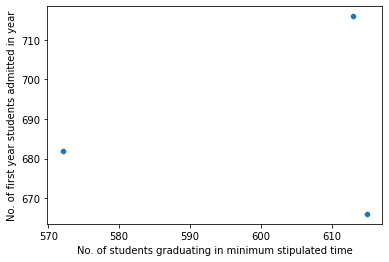

In [104]:
# !pip install matplotlib.pyplot
import matplotlib.pyplot as plt

sns.scatterplot(y="No. of first year students admitted in the year", x="No. of students graduating in minimum stipulated time", data=dfs3_2)
plt.ylabel("No. of first year students admitted in year",fontsize=10)
plt.xlabel("No. of students graduating in minimum stipulated time",fontsize=10)
plt.show()

#### There Does not seem to be any relation among them

### 2. No. of students placed VS Academic Year

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students placed'>

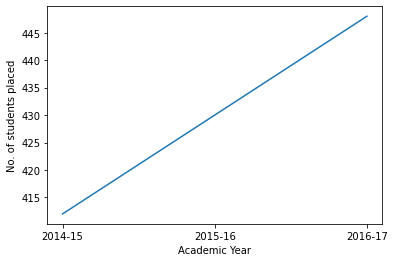

In [105]:
sns.lineplot(data=dfs3_2, y='No. of students placed', x='Academic Year')

#### As observed above, there seems to be positive linear relation between the two attributes 
But what we can see is the line is absolutely straigt with no spikes or dips, indicating there was a constast uniform increase in placed students throught the year

### 3. No. of students selected for Higher Studies VS Academic Year


<AxesSubplot:xlabel='Academic Year', ylabel='No. of students selected for Higher Studies'>

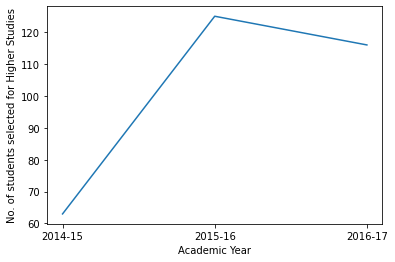

In [106]:
sns.lineplot(data=dfs3_2, y='No. of students selected for Higher Studies', x='Academic Year')

#### There is sharpe increase in Students selected for higher studies in year 2015-16
If we were working with a hugh amount of data, this could have acted as an outlier and steered our model the other way. Best to remove such observations.

### Now lets move onto 'Sponsored Research Details' Table to get Funding details.

In [109]:
dfs3_10= dfs3[10]
dfs3_10

,Financial Year,2019-20,2018-19,2017-18
0,Total no. of Sponsored Projects,622,563,409
1,Total no. of Funding Agencies,185,149,125
2,Total Amount Received (Amount in Rupees),2297748211,2298187443,2035039984
3,Amount Received in Words,Two Hundred and Twenty Nine Crores Seventy Sev...,Two Hundred and Twenty Nine Crores Eighty One ...,Two Hundred and Three Crores Fifty Lakhs Thirt...


### Data  Wrangling 

#### Transpose the tha dataframe and set relevant column names

In [110]:
dfs3_10 = dfs3_10.transpose()
dfs3_10.reset_index(inplace=True)
dfs3_10.columns = ['Financial Year',
                   'Total no. of Sponsored Projects', 
                   'Total no. of Funding Agencies',
                   'Total Amount Received (Amount in Rupees)',
                   'Amount Received in Words']
dfs3_10

,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees),Amount Received in Words
0,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees),Amount Received in Words
1,2019-20,622,185,2297748211,Two Hundred and Twenty Nine Crores Seventy Sev...
2,2018-19,563,149,2298187443,Two Hundred and Twenty Nine Crores Eighty One ...
3,2017-18,409,125,2035039984,Two Hundred and Three Crores Fifty Lakhs Thirt...


#### Drop irrelevant rows

In [111]:
dfs3_10=dfs3_10.drop(0)
dfs3_10

,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees),Amount Received in Words
1,2019-20,622,185,2297748211,Two Hundred and Twenty Nine Crores Seventy Sev...
2,2018-19,563,149,2298187443,Two Hundred and Twenty Nine Crores Eighty One ...
3,2017-18,409,125,2035039984,Two Hundred and Three Crores Fifty Lakhs Thirt...


#### Drop irrelevant Column

In [113]:
dfs3_10=dfs3_10.drop(['Amount Received in Words'], axis =1)
dfs3_10

,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees)
1,2019-20,622,185,2297748211
2,2018-19,563,149,2298187443
3,2017-18,409,125,2035039984


### Also convert Total Amount Received (Amount in Rupees) Column data type from object to int64

In [114]:
print(dfs3_10.dtypes)
dfs3_10 = dfs3_10.astype({'Total Amount Received (Amount in Rupees)' :'int64'})
print(dfs3_10.dtypes)

Financial Year                              object
Total no. of Sponsored Projects             object
Total no. of Funding Agencies               object
Total Amount Received (Amount in Rupees)    object
dtype: object
Financial Year                              object
Total no. of Sponsored Projects             object
Total no. of Funding Agencies               object
Total Amount Received (Amount in Rupees)     int64
dtype: object


Now let's start analyzing & visualization again

### 4. Total Amount Received


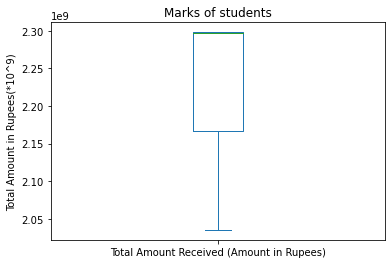

In [115]:
# let's use a boxplot

dfs3_10['Total Amount Received (Amount in Rupees)'].plot(kind='box', title='Marks of students')
plt.ylabel('Total Amount in Rupees(*10^9)')
plt.show()

#### From the above box plot, we can observe the following:
- Median: 2297748211
- Maximum = 2298187443
- Minimum = 2035039984

### 5. Now, let's analyze 'Financial Resources: Utilised Amount for the Capital expenditure for previous 3 years' table to understand spending patterns

In [119]:
dfs3_7 = dfs3[7]
dfs3_7

,Financial Year,2019-20,2018-19,2017-18
0,NaN,Utilised Amount,Utilised Amount,Utilised Amount
1,Annual Capital Expenditure on Academic Activit...,NaN,NaN,NaN
2,"Library ( Books, Journals and e-Resources only)",233311985 (Twenty Three Crores Thirty Three La...,186529104 (Eighteen Crores Sixty Five Lakhs Tw...,166714860 (Sixteen Crores Sixty Seven Lakh Fou...
3,New Equipment and software for Laboratories,1358206293 (One Hundred Thirty Five Crores Eig...,1203696299 (One Hundred Twenty Crore Thirty Si...,86137020 (Eight Crore Sixty One Lakh Thirty Se...
4,Engineering Workshops,7800414 (Seventy Eight Lakhs Four Hundred and ...,12162794 (One Crore Twenty One Lakhs Sixty Two...,24228357 (Two Crores Forty Two Lakhs Twenty Ei...


### Let's clean and pre process this data

#### Transpose

In [120]:
dfs3_7 = dfs3_7.transpose()
dfs3_7

,0,1,2,3,4
Financial Year,NaN,Annual Capital Expenditure on Academic Activit...,"Library ( Books, Journals and e-Resources only)",New Equipment and software for Laboratories,Engineering Workshops
2019-20,Utilised Amount,NaN,233311985 (Twenty Three Crores Thirty Three La...,1358206293 (One Hundred Thirty Five Crores Eig...,7800414 (Seventy Eight Lakhs Four Hundred and ...
2018-19,Utilised Amount,NaN,186529104 (Eighteen Crores Sixty Five Lakhs Tw...,1203696299 (One Hundred Twenty Crore Thirty Si...,12162794 (One Crore Twenty One Lakhs Sixty Two...
2017-18,Utilised Amount,NaN,166714860 (Sixteen Crores Sixty Seven Lakh Fou...,86137020 (Eight Crore Sixty One Lakh Thirty Se...,24228357 (Two Crores Forty Two Lakhs Twenty Ei...


#### Set columns & reset indices

In [123]:
dfs3_7.columns = ['Drop','Library', 'Software & Equipment', 'Eng Workshop', 'Others']
dfs3_7.reset_index(drop = True, inplace=True)
# dfs3_7.drop('Drop1', axis =1, inplace=True)
dfs3_7.drop('Drop', axis =1, inplace=True)
dfs3_7

,Library,Software & Equipment,Eng Workshop,Others
0,Annual Capital Expenditure on Academic Activit...,"Library ( Books, Journals and e-Resources only)",New Equipment and software for Laboratories,Engineering Workshops
1,NaN,233311985 (Twenty Three Crores Thirty Three La...,1358206293 (One Hundred Thirty Five Crores Eig...,7800414 (Seventy Eight Lakhs Four Hundred and ...
2,NaN,186529104 (Eighteen Crores Sixty Five Lakhs Tw...,1203696299 (One Hundred Twenty Crore Thirty Si...,12162794 (One Crore Twenty One Lakhs Sixty Two...
3,NaN,166714860 (Sixteen Crores Sixty Seven Lakh Fou...,86137020 (Eight Crore Sixty One Lakh Thirty Se...,24228357 (Two Crores Forty Two Lakhs Twenty Ei...


#### Drop irrelevant row

In [124]:
dfs3_7 = dfs3_7.drop(0)

#### Add the Financial Column Back

In [96]:
fin_yr = ['2019-20', '2018-19', '2017-18']
dfs3_7['Financial Year'] = fin_yr

In [125]:
dfs3_7['Library'] = dfs3_7['Library'].str.replace('\d+', '')
dfs3_7['Software & Equipment'] = dfs3_7['Software & Equipment'].str.replace('\d+', '')
dfs3_7['Eng Workshop'] = dfs3_7['Eng Workshop'].str.replace('\d+', '')
dfs3_7['Others'] = dfs3_7['Others'].str.replace('\d+', '')


C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/89970923.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs3_7['Library'] = dfs3_7['Library'].str.replace('\d+', '')
C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/89970923.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs3_7['Software & Equipment'] = dfs3_7['Software & Equipment'].str.replace('\d+', '')
C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/89970923.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs3_7['Eng Workshop'] = dfs3_7['Eng Workshop'].str.replace('\d+', '')
C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/89970923.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs3_7['Others'] = dfs3_7['Others'].str.replace('\d+', '')


In [126]:
dfs3_7

,Library,Software & Equipment,Eng Workshop,Others
1,NaN,(Twenty Three Crores Thirty Three Lakhs Eleve...,(One Hundred Thirty Five Crores Eighty Two\rL...,(Seventy Eight Lakhs Four Hundred and Fourtee...
2,NaN,(Eighteen Crores Sixty Five Lakhs Twenty Nine...,(One Hundred Twenty Crore Thirty Six Lakhs\rN...,(One Crore Twenty One Lakhs Sixty Two Thousan...
3,NaN,(Sixteen Crores Sixty Seven Lakh Fourteen\rTh...,(Eight Crore Sixty One Lakh Thirty Seven Thou...,(Two Crores Forty Two Lakhs Twenty Eight\rTho...


This is the final Cleaned data ready to analyze Spending Patterns.

## 4. EDA on ```ins_id[3]``` i.e. IIT KANPUR

In [127]:
# !pip install tabula-py
import tabula

dfs4 = tabula.read_pdf(f'https://www.nirfindia.org/nirfpdfcdn/2021/pdf/Engineering/{ins_id[3]}.pdf', pages='all')
'''
for the sake of simplicity, 
we will only stick to 'UG [4 Years Program(s)]: Placement & higher studies for previous 3 years' table 
'''

dfs4_2= dfs4[2]
dfs4_2

,Academic Year,No. of first year\rstudents intake in the\ryear,No. of first year\rstudents admitted in\rthe year,Academic Year.1,No. of students\radmitted through\rLateral entry,Academic Year.2,No. of students\rgraduating in\rminimum stipulated\rtime,No. of students\rplaced,Median salary of\rplaced\rgraduates(Amount in\rRs.),No. of students\rselected for Higher\rStudies
0,2014-15,827,809,2015-16,0,2017-18,789,354,1400000(Fourteen\rLakhs),387
1,2015-16,827,803,2016-17,0,2018-19,770,437,1500000(Fifteen\rLakhs),301
2,2016-17,827,826,2017-18,0,2019-20,789,463,1700000(Seventeen\rLakhs),325


### DATA WRANGLING

#### Dropping uneneccasary columns

In [128]:
unn = ['Academic Year.1', 'Academic Year.2']
dfs4_2 = dfs4_2.drop(unn, 1)
dfs4_2

C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/515230566.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfs4_2 = dfs4_2.drop(unn, 1)


,Academic Year,No. of first year\rstudents intake in the\ryear,No. of first year\rstudents admitted in\rthe year,No. of students\radmitted through\rLateral entry,No. of students\rgraduating in\rminimum stipulated\rtime,No. of students\rplaced,Median salary of\rplaced\rgraduates(Amount in\rRs.),No. of students\rselected for Higher\rStudies
0,2014-15,827,809,0,789,354,1400000(Fourteen\rLakhs),387
1,2015-16,827,803,0,770,437,1500000(Fifteen\rLakhs),301
2,2016-17,827,826,0,789,463,1700000(Seventeen\rLakhs),325


#### Making the column names more comprehensible

In [129]:
dfs4_2.columns = ['Academic Year', 
                  'No. of first year students intake in the year', 
                  'No. of first year students admitted in the year',
                  'No. of students admitted through Lateral entry', 
                  'No. of students graduating in minimum stipulated time',
                  'No. of students placed',
                  'Median salary of placed graduates(Amount inRs.)', 
                  'No. of students selected for Higher Studies']
dfs4_2

,Academic Year,No. of first year students intake in the year,No. of first year students admitted in the year,No. of students admitted through Lateral entry,No. of students graduating in minimum stipulated time,No. of students placed,Median salary of placed graduates(Amount inRs.),No. of students selected for Higher Studies
0,2014-15,827,809,0,789,354,1400000(Fourteen\rLakhs),387
1,2015-16,827,803,0,770,437,1500000(Fifteen\rLakhs),301
2,2016-17,827,826,0,789,463,1700000(Seventeen\rLakhs),325


## DATA VISUALIZATION & ANALYSIS
### 1. No. of first year students admitted in year VS No. of students graduating in minimum stipulated time



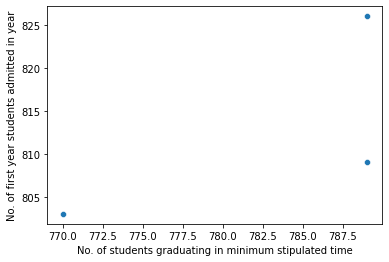

In [130]:
# !pip install matplotlib.pyplot
import matplotlib.pyplot as plt

sns.scatterplot(y="No. of first year students admitted in the year", x="No. of students graduating in minimum stipulated time", data=dfs4_2)
plt.ylabel("No. of first year students admitted in year",fontsize=10)
plt.xlabel("No. of students graduating in minimum stipulated time",fontsize=10)
plt.show()

#### There Does not seem to be any relation among them

### 2. No. of students placed VS Academic Year

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students placed'>

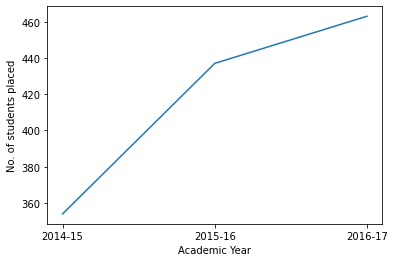

In [131]:
sns.lineplot(data=dfs4_2, y='No. of students placed', x='Academic Year')

#### As observed above, there seems to be positive linear relation between the two attributes 
There is a slight spike at year 2015-16 for students getting placed.

### 3. No. of students selected for Higher Studies VS Academic Year


<AxesSubplot:xlabel='Academic Year', ylabel='No. of students selected for Higher Studies'>

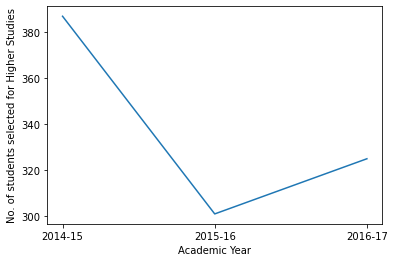

In [132]:
sns.lineplot(data=dfs4_2, y='No. of students selected for Higher Studies', x='Academic Year')

#### There is sharpe decrease in Students selected for higher studies in year 2015-16
This could be the reason for spike in students getting placed in year 2015-16 above.

### 4. Total Amount Received


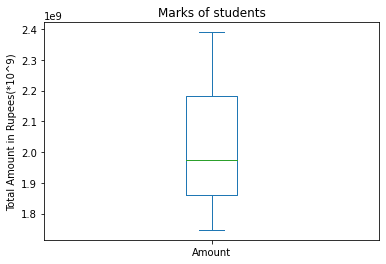

In [141]:
# let's use a boxplot

x =pd.DataFrame({'Amount': (2389745850, 1974913396, 1747013587)})
x.plot(kind='box', title='Marks of students')
plt.ylabel('Total Amount in Rupees(*10^9)')
plt.show()

#### From the above box plot, we can observe the following:
- Median: 1974913396
- Maximum = 2389745850
- Minimum = 1747013587

### 5. Now, let's analyze 'Financial Resources: Utilised Amount for the Capital expenditure for previous 3 years' table to understand spending patterns

In [143]:
dfs4_6 = dfs4[6]
dfs4_6

,Financial Year,2019-20,2018-19,2017-18
0,NaN,Utilised Amount,Utilised Amount,Utilised Amount
1,Annual Capital Expenditure on Academic Activit...,NaN,NaN,NaN
2,"Library ( Books, Journals and e-Resources only)",168000000 (Sixteen Crore Eighty Lakh),153000000 (Fifteen Crore Thirty Lakh),129600000 (Twelve Crore Ninety Six Lakh)
3,New Equipment and software for Laboratories,685769251 (Sixty Eight Crore Fifty Seven Lakh ...,674586035 (Sixty Seven Crore Forty Five Lakh E...,621194478 (Sixty Two Crore Eleven Lakh Ninety ...
4,Engineering Workshops,98500000 (Nine Crore Eighty Five Lakh),44400000 (Four Crore Forty Four Lakh),96400000 (Nine Crore Sixty Four Lakh)
5,Other expenditure on creation of Capital Asset...,73400000 (Seven Crore Thirty Four Lakh),46700000 (Four Crore Sixty Seven Lakh),15000000 (One Crore Fifty Lakh)


### Let's clean and pre process this data

#### Transpose

In [144]:
dfs4_6 = dfs4_6.transpose()
dfs4_6

,0,1,2,3,4,5
Financial Year,NaN,Annual Capital Expenditure on Academic Activit...,"Library ( Books, Journals and e-Resources only)",New Equipment and software for Laboratories,Engineering Workshops,Other expenditure on creation of Capital Asset...
2019-20,Utilised Amount,NaN,168000000 (Sixteen Crore Eighty Lakh),685769251 (Sixty Eight Crore Fifty Seven Lakh ...,98500000 (Nine Crore Eighty Five Lakh),73400000 (Seven Crore Thirty Four Lakh)
2018-19,Utilised Amount,NaN,153000000 (Fifteen Crore Thirty Lakh),674586035 (Sixty Seven Crore Forty Five Lakh E...,44400000 (Four Crore Forty Four Lakh),46700000 (Four Crore Sixty Seven Lakh)
2017-18,Utilised Amount,NaN,129600000 (Twelve Crore Ninety Six Lakh),621194478 (Sixty Two Crore Eleven Lakh Ninety ...,96400000 (Nine Crore Sixty Four Lakh),15000000 (One Crore Fifty Lakh)


#### Set columns & reset indices

In [149]:
dfs4_6.columns = ['Drop1','Drop','Library', 'Software & Equipment', 'Eng Workshop', 'Others']
# dfs3_7.reset_index(drop = True, inplace=True)
dfs4_6.drop('Drop1', axis =1, inplace=True)
dfs4_6.drop('Drop', axis =1, inplace=True)
dfs4_6

,Library,Software & Equipment,Eng Workshop,Others
Financial Year,"Library ( Books, Journals and e-Resources only)",New Equipment and software for Laboratories,Engineering Workshops,Other expenditure on creation of Capital Asset...
2019-20,168000000 (Sixteen Crore Eighty Lakh),685769251 (Sixty Eight Crore Fifty Seven Lakh ...,98500000 (Nine Crore Eighty Five Lakh),73400000 (Seven Crore Thirty Four Lakh)
2018-19,153000000 (Fifteen Crore Thirty Lakh),674586035 (Sixty Seven Crore Forty Five Lakh E...,44400000 (Four Crore Forty Four Lakh),46700000 (Four Crore Sixty Seven Lakh)
2017-18,129600000 (Twelve Crore Ninety Six Lakh),621194478 (Sixty Two Crore Eleven Lakh Ninety ...,96400000 (Nine Crore Sixty Four Lakh),15000000 (One Crore Fifty Lakh)


#### Drop irrelevant row

In [154]:
dfs4_6.reset_index(drop = True, inplace=True)

dfs4_6 = dfs4_6.drop(0)

#### Add the Financial Column Back

In [96]:
fin_yr = ['2019-20', '2018-19', '2017-18']
dfs4_6['Financial Year'] = fin_yr

In [156]:
dfs4_6['Library'] = dfs4_6['Library'].str.replace('\d+', '')
dfs4_6['Software & Equipment'] = dfs4_6['Software & Equipment'].str.replace('\d+', '')
dfs4_6['Eng Workshop'] = dfs4_6['Eng Workshop'].str.replace('\d+', '')
dfs4_6['Others'] = dfs4_6['Others'].str.replace('\d+', '')


C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/2469770292.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs4_6['Library'] = dfs4_6['Library'].str.replace('\d+', '')
C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/2469770292.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs4_6['Software & Equipment'] = dfs4_6['Software & Equipment'].str.replace('\d+', '')
C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/2469770292.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs4_6['Eng Workshop'] = dfs4_6['Eng Workshop'].str.replace('\d+', '')
C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/2469770292.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs4_6['Others'] = dfs4_6['Others'].str.replace('\d+', '')


In [157]:
dfs4_6

,Library,Software & Equipment,Eng Workshop,Others
1,(Sixteen Crore Eighty Lakh),(Sixty Eight Crore Fifty Seven Lakh Sixty Nin...,(Nine Crore Eighty Five Lakh),(Seven Crore Thirty Four Lakh)
2,(Fifteen Crore Thirty Lakh),(Sixty Seven Crore Forty Five Lakh Eighty Six...,(Four Crore Forty Four Lakh),(Four Crore Sixty Seven Lakh)
3,(Twelve Crore Ninety Six Lakh),(Sixty Two Crore Eleven Lakh Ninety Four\rTho...,(Nine Crore Sixty Four Lakh),(One Crore Fifty Lakh)


This is the final Cleaned data ready to analyze Spending Patterns.

## 5. EDA on ```ins_id[4]``` i.e. IIT KHARAGPUR

In [158]:
# !pip install tabula-py
import tabula

dfs5 = tabula.read_pdf(f'https://www.nirfindia.org/nirfpdfcdn/2021/pdf/Engineering/{ins_id[4]}.pdf', pages='all')
'''
for the sake of simplicity, 
we will only stick to 'UG [4 Years Program(s)]: Placement & higher studies for previous 3 years' table 
'''

dfs5_2= dfs5[2]
dfs5_2

,Academic Year,No. of first year\rstudents intake in the\ryear,No. of first year\rstudents admitted in\rthe year,Academic Year.1,No. of students\radmitted through\rLateral entry,Academic Year.2,No. of students\rgraduating in\rminimum stipulated\rtime,No. of students\rplaced,Median salary of\rplaced\rgraduates(Amount in\rRs.),No. of students\rselected for Higher\rStudies
0,2014-15,656,641,2015-16,0,2017-18,475,391,1275000(Twelve lakh\rSeventy Five\rThousand),44
1,2015-16,656,637,2016-17,0,2018-19,535,437,1420059(Fourteen\rLakh Twenty\rThousand Fifty ...,53
2,2016-17,656,655,2017-18,0,2019-20,451,416,1600000(Sixteen Lakh),32


### DATA WRANGLING

#### Dropping uneneccasary columns

In [159]:
unn = ['Academic Year.1', 'Academic Year.2']
dfs5_2 = dfs5_2.drop(unn, 1)
dfs5_2

C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/2637165538.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfs5_2 = dfs5_2.drop(unn, 1)


,Academic Year,No. of first year\rstudents intake in the\ryear,No. of first year\rstudents admitted in\rthe year,No. of students\radmitted through\rLateral entry,No. of students\rgraduating in\rminimum stipulated\rtime,No. of students\rplaced,Median salary of\rplaced\rgraduates(Amount in\rRs.),No. of students\rselected for Higher\rStudies
0,2014-15,656,641,0,475,391,1275000(Twelve lakh\rSeventy Five\rThousand),44
1,2015-16,656,637,0,535,437,1420059(Fourteen\rLakh Twenty\rThousand Fifty ...,53
2,2016-17,656,655,0,451,416,1600000(Sixteen Lakh),32


#### Making the column names more comprehensible

In [160]:
dfs5_2.columns = ['Academic Year', 
                  'No. of first year students intake in the year', 
                  'No. of first year students admitted in the year',
                  'No. of students admitted through Lateral entry', 
                  'No. of students graduating in minimum stipulated time',
                  'No. of students placed',
                  'Median salary of placed graduates(Amount inRs.)', 
                  'No. of students selected for Higher Studies']
dfs5_2

,Academic Year,No. of first year students intake in the year,No. of first year students admitted in the year,No. of students admitted through Lateral entry,No. of students graduating in minimum stipulated time,No. of students placed,Median salary of placed graduates(Amount inRs.),No. of students selected for Higher Studies
0,2014-15,656,641,0,475,391,1275000(Twelve lakh\rSeventy Five\rThousand),44
1,2015-16,656,637,0,535,437,1420059(Fourteen\rLakh Twenty\rThousand Fifty ...,53
2,2016-17,656,655,0,451,416,1600000(Sixteen Lakh),32


## DATA VISUALIZATION & ANALYSIS
### 1. No. of first year students admitted in year VS No. of students graduating in minimum stipulated time



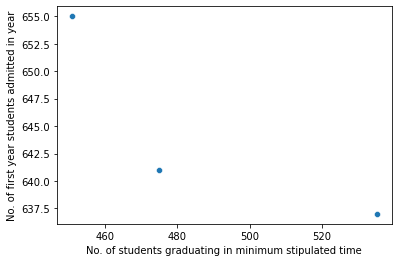

In [161]:
dfs5_2# !pip install matplotlib.pyplot
import matplotlib.pyplot as plt

sns.scatterplot(y="No. of first year students admitted in the year", x="No. of students graduating in minimum stipulated time", data=dfs5_2)
plt.ylabel("No. of first year students admitted in year",fontsize=10)
plt.xlabel("No. of students graduating in minimum stipulated time",fontsize=10)
plt.show()

#### There seems to be a negative correlation b/w them
with increase in no. of students graduating, no. of students admitted seems to decrease.

### 2. No. of students placed VS Academic Year

<AxesSubplot:xlabel='Academic Year', ylabel='No. of students placed'>

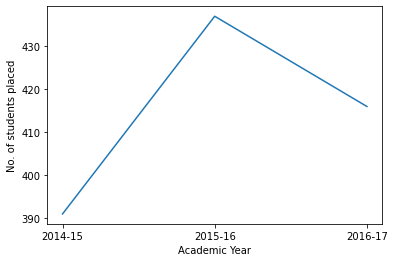

In [162]:
sns.lineplot(data=dfs5_2, y='No. of students placed', x='Academic Year')

#### As observed above, there does not seem to be any linear relation here
There is a Huge spike at year 2015-16 for students getting placed.

### 3. No. of students selected for Higher Studies VS Academic Year


<AxesSubplot:xlabel='Academic Year', ylabel='No. of students selected for Higher Studies'>

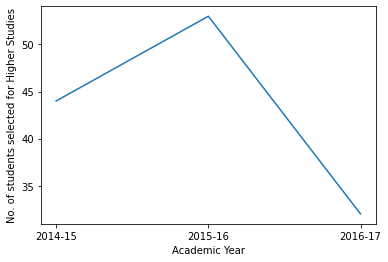

In [163]:
sns.lineplot(data=dfs5_2, y='No. of students selected for Higher Studies', x='Academic Year')

#### There is sharpe spike again in Students selected for higher studies in year 2015-16
Both placements and students getting selected got spiked during this year, which checks out with the data and could be due to some underlying cause.

### Now lets move onto 'Sponsored Research Details' Table to get Funding details.

In [169]:
dfs5_11= dfs5[11]
dfs5_11

,Financial Year,2019-20,2018-19,2017-18
0,Total no. of Sponsored Projects,154,700,627
1,Total no. of Funding Agencies,65,193,202
2,Total Amount Received (Amount in Rupees),648432016,1349147118,2051250000
3,Amount Received in Words,Sixty Four Crore Eighty Four lakh Thirty Two T...,One Three Four Crore Ninety One Lakh Forty Sev...,Two Zero Five Crore Twelve Lakh Fifty Thousand


### Data  Wrangling 

#### Transpose the tha dataframe and set relevant column names

In [170]:
dfs5_11 = dfs5_11.transpose()
dfs5_11.reset_index(inplace=True)
dfs5_11.columns = ['Financial Year',
                   'Total no. of Sponsored Projects', 
                   'Total no. of Funding Agencies',
                   'Total Amount Received (Amount in Rupees)',
                   'Amount Received in Words']
dfs5_11

,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees),Amount Received in Words
0,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees),Amount Received in Words
1,2019-20,154,65,648432016,Sixty Four Crore Eighty Four lakh Thirty Two T...
2,2018-19,700,193,1349147118,One Three Four Crore Ninety One Lakh Forty Sev...
3,2017-18,627,202,2051250000,Two Zero Five Crore Twelve Lakh Fifty Thousand


#### Drop irrelevant rows

In [171]:
dfs5_11=dfs5_11.drop(0)
dfs5_11

,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees),Amount Received in Words
1,2019-20,154,65,648432016,Sixty Four Crore Eighty Four lakh Thirty Two T...
2,2018-19,700,193,1349147118,One Three Four Crore Ninety One Lakh Forty Sev...
3,2017-18,627,202,2051250000,Two Zero Five Crore Twelve Lakh Fifty Thousand


#### Drop irrelevant Column

In [172]:
dfs5_11=dfs5_11.drop(['Amount Received in Words'], axis =1)
dfs5_11

,Financial Year,Total no. of Sponsored Projects,Total no. of Funding Agencies,Total Amount Received (Amount in Rupees)
1,2019-20,154,65,648432016
2,2018-19,700,193,1349147118
3,2017-18,627,202,2051250000


### Also convert Total Amount Received (Amount in Rupees) Column data type from object to int64

In [173]:
print(dfs5_11.dtypes)
dfs5_11 = dfs5_11.astype({'Total Amount Received (Amount in Rupees)' :'int64'})
print(dfs5_11.dtypes)

Financial Year                              object
Total no. of Sponsored Projects             object
Total no. of Funding Agencies               object
Total Amount Received (Amount in Rupees)    object
dtype: object
Financial Year                              object
Total no. of Sponsored Projects             object
Total no. of Funding Agencies               object
Total Amount Received (Amount in Rupees)     int64
dtype: object


Now let's start analyzing & visualization again

### 4. Total Amount Received


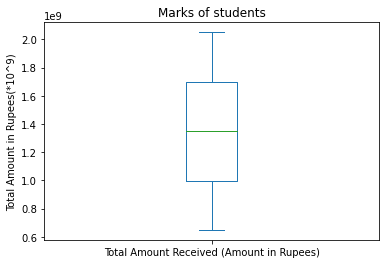

In [175]:
# let's use a boxplot

dfs5_11['Total Amount Received (Amount in Rupees)'].plot(kind='box', title='Marks of students')
plt.ylabel('Total Amount in Rupees(*10^9)')
plt.show()

#### From the above box plot, we can observe the following:
- Median: 1349147118
- Maximum = 2051250000
- Minimum = 648432016

### 5. Now, let's analyze 'Financial Resources: Utilised Amount for the Capital expenditure for previous 3 years' table to understand spending patterns

In [179]:
dfs5_9 = dfs5[9]
dfs5_9

,Financial Year,2019-20,2018-19,2017-18
0,NaN,Utilised Amount,Utilised Amount,Utilised Amount
1,Annual Capital Expenditure on Academic Activit...,NaN,NaN,NaN
2,"Library ( Books, Journals and e-Resources only)",227325689 (Twenty Two Crores Seventy Three Lak...,220397215 (twenty two crore three lakh ninety ...,175230715 (seventeen crore fifty two lakh thir...
3,New Equipment and software for Laboratories,224238505 (Twenty Two Crores Forty Two Lakhs T...,117316668 (eleven crore seventy three lakh six...,284543926 (twenty eight crore forty five lakh ...
4,Engineering Workshops,0 (Zero),0 (zero),0 (zero)
5,Other expenditure on creation of Capital Asset...,275567881 (Twenty Seven Crores Fifty Five Lakh...,589182201 (fifty eight crore ninety one lakh e...,356546168 (thirty five crore sixty five lakh f...


### Let's clean and pre process this data

#### Transpose

In [180]:
dfs5_9 = dfs5_9.transpose()
dfs5_9

,0,1,2,3,4,5
Financial Year,NaN,Annual Capital Expenditure on Academic Activit...,"Library ( Books, Journals and e-Resources only)",New Equipment and software for Laboratories,Engineering Workshops,Other expenditure on creation of Capital Asset...
2019-20,Utilised Amount,NaN,227325689 (Twenty Two Crores Seventy Three Lak...,224238505 (Twenty Two Crores Forty Two Lakhs T...,0 (Zero),275567881 (Twenty Seven Crores Fifty Five Lakh...
2018-19,Utilised Amount,NaN,220397215 (twenty two crore three lakh ninety ...,117316668 (eleven crore seventy three lakh six...,0 (zero),589182201 (fifty eight crore ninety one lakh e...
2017-18,Utilised Amount,NaN,175230715 (seventeen crore fifty two lakh thir...,284543926 (twenty eight crore forty five lakh ...,0 (zero),356546168 (thirty five crore sixty five lakh f...


#### Set columns & reset indices

In [181]:
dfs5_9.columns = ['Drop1','Drop','Library', 'Software & Equipment', 'Eng Workshop', 'Others']
# dfs3_7.reset_index(drop = True, inplace=True)
dfs5_9.drop('Drop1', axis =1, inplace=True)
dfs5_9.drop('Drop', axis =1, inplace=True)
dfs5_9

,Library,Software & Equipment,Eng Workshop,Others
Financial Year,"Library ( Books, Journals and e-Resources only)",New Equipment and software for Laboratories,Engineering Workshops,Other expenditure on creation of Capital Asset...
2019-20,227325689 (Twenty Two Crores Seventy Three Lak...,224238505 (Twenty Two Crores Forty Two Lakhs T...,0 (Zero),275567881 (Twenty Seven Crores Fifty Five Lakh...
2018-19,220397215 (twenty two crore three lakh ninety ...,117316668 (eleven crore seventy three lakh six...,0 (zero),589182201 (fifty eight crore ninety one lakh e...
2017-18,175230715 (seventeen crore fifty two lakh thir...,284543926 (twenty eight crore forty five lakh ...,0 (zero),356546168 (thirty five crore sixty five lakh f...


#### Drop irrelevant row

In [183]:
dfs5_9.reset_index(drop = True, inplace=True)

dfs5_9 = dfs5_9.drop(0)

#### Add the Financial Column Back

In [184]:
fin_yr = ['2019-20', '2018-19', '2017-18']
dfs5_9['Financial Year'] = fin_yr

In [185]:
dfs5_9['Library'] = dfs5_9['Library'].str.replace('\d+', '')
dfs5_9['Software & Equipment'] =dfs5_9['Software & Equipment'].str.replace('\d+', '')
dfs5_9['Eng Workshop'] = dfs5_9['Eng Workshop'].str.replace('\d+', '')
dfs5_9['Others'] = dfs5_9['Others'].str.replace('\d+', '')


C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/1577239565.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs5_9['Library'] = dfs5_9['Library'].str.replace('\d+', '')
C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/1577239565.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs5_9['Software & Equipment'] =dfs5_9['Software & Equipment'].str.replace('\d+', '')
C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/1577239565.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs5_9['Eng Workshop'] = dfs5_9['Eng Workshop'].str.replace('\d+', '')
C:\Users\NemoKumar\AppData\Local\Temp/ipykernel_13368/1577239565.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dfs5_9['Others'] = dfs5_9['Others'].str.replace('\d+', '')


In [186]:
dfs5_9

,Library,Software & Equipment,Eng Workshop,Others,Financial Year
1,(Twenty Two Crores Seventy Three Lakhs Twenty...,(Twenty Two Crores Forty Two Lakhs Thirty Eig...,(Zero),(Twenty Seven Crores Fifty Five Lakhs Sixty S...,2019-20
2,(twenty two crore three lakh ninety seven tho...,(eleven crore seventy three lakh sixteen thou...,(zero),(fifty eight crore ninety one lakh eight two ...,2018-19
3,(seventeen crore fifty two lakh thirty thousa...,(twenty eight crore forty five lakh forty thr...,(zero),(thirty five crore sixty five lakh forty six ...,2017-18


This is the final Cleaned data ready to analyze Spending Patterns.

---

---
Hence, completed the required Task.
---

#### Innovative Insight Found: In most cases, when there was a spike or dip in any attribute, there was a counter attribute which contributed to it.
#### Such as No. of Students getting Placed being balanced by No. of students getting selected for higher studies.
---

|Submitted By|Contact No.|Mail|Linkedin|
|---|---|---|---|
|Naman Kumar|7838724481|namankumarofficial2002@gmail.com|[Linkedin](https://www.linkedin.com/in/naman-kumar-b45921201/)|